In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from netCDF4 import Dataset

from shallow_water import create_anim

plt.rcParams['animation.html'] = 'html5'
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from rotate_sw import EQSW as SW

Lx = 1e7
Ly = 1e7
dx = dy = 5e4
steps = 5000

sw = SW(dx, dy, Lx, Ly)
sw.eta[1:-1, 1:-1] = sw.set_gaussian(Lx/2., 0., 8e5)
# sw.alpha = [1e-5, 1e-5]
# sw.simulate(steps)

In [7]:
sw.print_info()

Height:        400.0
Basin widths:  10000000.0 10000000.0
Grid spacing:  50000.0 x 50000.0
Grid size:     (202, 202)
Rossby radius x = y = 0: -110090.88
c              2.0


rotate_sw.py:76: RuntimeWarning: divide by zero encountered in divide
  R = np.sqrt(self.g * self.H)/self.f


502it [01:36,  4.75it/s]                         

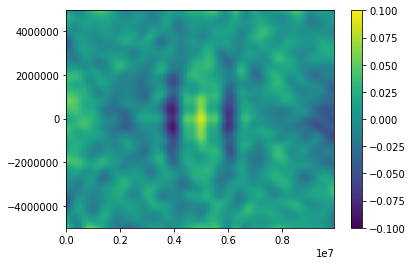

In [3]:
with Dataset("SW_L10000000.0_dx50000.0.nc", "r") as df:
    ETA = df['eta'][::10]
#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]

create_anim(x, y, ETA, figsize=(5,7))

In [4]:
sw.f

array([[ -1.81668091e-05,  -1.81668091e-05,  -1.81668091e-05, ...,
         -1.81668091e-05,  -1.81668091e-05,  -1.81668091e-05],
       [ -1.81668091e-05,  -1.81668091e-05,  -1.81668091e-05, ...,
         -1.81668091e-05,  -1.81668091e-05,  -1.81668091e-05],
       [ -1.79851410e-05,  -1.79851410e-05,  -1.79851410e-05, ...,
         -1.79851410e-05,  -1.79851410e-05,  -1.79851410e-05],
       ..., 
       [  1.78034729e-05,   1.78034729e-05,   1.78034729e-05, ...,
          1.78034729e-05,   1.78034729e-05,   1.78034729e-05],
       [  1.79851410e-05,   1.79851410e-05,   1.79851410e-05, ...,
          1.79851410e-05,   1.79851410e-05,   1.79851410e-05],
       [  1.79851410e-05,   1.79851410e-05,   1.79851410e-05, ...,
          1.79851410e-05,   1.79851410e-05,   1.79851410e-05]])

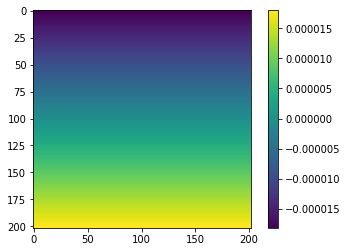

In [3]:
plt.imshow(sw.f)
plt.colorbar()
plt.show()


 96%|█████████▌| 4780/5000 [00:30<00:01, 164.79it/s]


 59%|█████▉    | 296/500 [01:00<00:39,  5.13it/s]


100%|██████████| 500/500 [01:37<00:00,  5.62it/s]
501it [01:37,  5.58it/s]                         
502it [01:37,  5.61it/s]

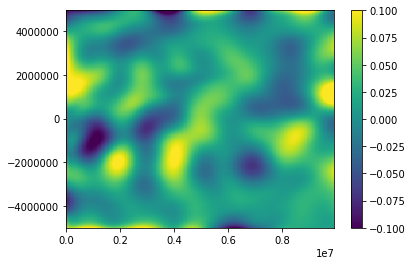

In [4]:
from rotate_sw import EQSW as SW

Lx = 3e6
Ly = 3e6
dx = dy = 30e3
steps = 5000

sw = SW(dx, dy, Lx, Ly)
sw.eta[1:-1, 1:-1] = sw.set_gaussian(Lx/5., Ly/5., Lx/15.)
# sw.alpha = [1e-5, 1e-5]
sw.simulate(steps)

with Dataset("SW_L10000000.0_dx50000.0.nc", "r") as df:
    ETA = df['eta'][::10]
#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]

create_anim(x, y, ETA, figsize=(5,7))

TypeError: Dimensions of C (102, 102) are incompatible with X (100) and/or Y (100); see help(pcolormesh)

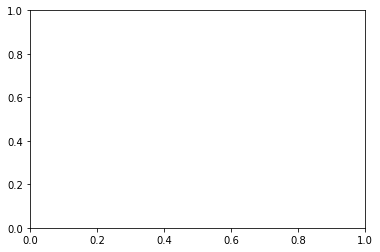

In [6]:
# plt.figure(figsize=(5,7))
# plt.pcolormesh(sw.x, sw.y, sw.f[1:-1,1:-1])
plt.pcolormesh(sw.x, sw.y, sw.f)
plt.colorbar()
plt.show()